# Data Driven Approach to Predicting Game Success

## Introduction
The video game industry is highly dynamic, with changing platform preferences, shifting genre popularity, and the influence of user and critic reviews. The goal of this project is to identify key patterns that determine whether a game succeeds or fails, enabling Ice to optimize advertising campaigns for 2017.

Using historical data up to 2016, we will analyze trends in platform sales, genre performance, and the impact of reviews on sales. We will also test hypotheses related to platform and genre ratings. The findings will help in predicting high-potential games and ensuring effective marketing strategies.

## Strategy

### Data Exploration:
(1) Examine the number of games released per year and identify relevant periods.

(2) Analyze platform sales trends, highlighting leading, growing, and declining platforms.

(3) Identify popular genres and their sales distributions.

### Statistical Analysis & Visualizations:
(1) Build sales distributions and box plots for different platforms.

(2) Study the correlation between user/professional reviews and sales.

(3) Compare game sales across multiple platforms.

### Hypothesis Testing:
(1) Compare average user ratings between Xbox One and PC.

(2) Test if user ratings for Action and Sports genres differ.

### Conclusion & Recommendations:
(1) Summarize key findings.

(2) Recommend platforms and genres for marketing focus.

(3) Suggest data-driven strategies for advertising campaigns in 2017.

## Load Data

In [1]:
# Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st

In [2]:
# Dataset
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
# Sample
data.sample()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5526,NBA Live 96,PS,1996.0,Sports,0.16,0.11,0.04,0.02,NaN,NaN,NaN


In [4]:
# Check for duplicates
duplicates = data.duplicated().sum()
duplicates

0

## Prepare Data

In [5]:
# Missing Values
# Drop name and genre rows with missing values
data = data.dropna(subset=['Name', 'Genre'])

# Drop year of release rows with missing values. Convert to type int
data = data.dropna(subset=['Year_of_Release'])
data['Year_of_Release'] = data['Year_of_Release'].astype(int)

# Convert user score to float changing tbd to nan
data['User_Score'] = data['User_Score'].replace('tbd', np.nan).astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16444 non-null  object 
 1   Platform         16444 non-null  object 
 2   Year_of_Release  16444 non-null  int64  
 3   Genre            16444 non-null  object 
 4   NA_sales         16444 non-null  float64
 5   EU_sales         16444 non-null  float64
 6   JP_sales         16444 non-null  float64
 7   Other_sales      16444 non-null  float64
 8   Critic_Score     7983 non-null   float64
 9   User_Score       7463 non-null   float64
 10  Rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [6]:
# Fill missing values
data['Rating'].fillna('Unknown', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16444 non-null  object 
 1   Platform         16444 non-null  object 
 2   Year_of_Release  16444 non-null  int64  
 3   Genre            16444 non-null  object 
 4   NA_sales         16444 non-null  float64
 5   EU_sales         16444 non-null  float64
 6   JP_sales         16444 non-null  float64
 7   Other_sales      16444 non-null  float64
 8   Critic_Score     7983 non-null   float64
 9   User_Score       7463 non-null   float64
 10  Rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [7]:
data.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
937,NBA Live 2002,PS2,2001,Sports,0.91,0.71,0.00,0.24,70.0,7.4,E
146,Metal Gear Solid,PS,1998,Action,3.18,1.83,0.78,0.24,94.0,9.4,M
2470,Sniper Elite V2,X360,2012,Shooter,0.46,0.28,0.02,0.07,67.0,6.8,M
6964,Pro Yakyuu Team o Tsukurou!,DC,1999,Sports,0.00,0.00,0.23,0.00,NaN,NaN,Unknown
11300,Pachitte Chonmage Tatsujin 13: Pachinko Hissat...,PS2,2007,Misc,0.00,0.00,0.08,0.00,NaN,NaN,Unknown


### Summary 
(1) Removed duplicate rows

(2) Handled missing values (Critic_Score, User_Score, Rating)

(3) Converted Year_of_Release to integer

(4) Ensured all columns are properly formatted

## Exploratory Data Analysis 

### Game Releases Per Year

In [8]:
# Game Releases per year
games_year = data['Year_of_Release'].value_counts().sort_index()
games_year

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: Year_of_Release, dtype: int64

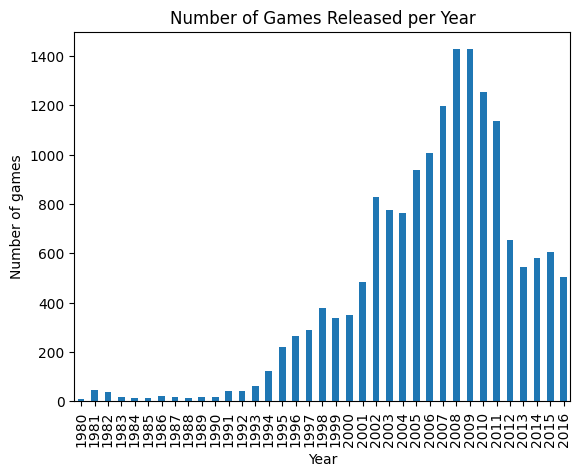

In [9]:
games_year.plot(
    kind='bar',
    title='Number of Games Released per Year',
    xlabel='Year',
    ylabel='Number of games'
)
plt.xticks(rotation=90, ha='center')
plt.show()

### Summary:
The data shows a significant increase in game releases from the early 2000s, peaking in 2008 and 2009 with over 1,400 titles. This surge can be attributed to the rise of popular gaming platforms and digital distribution. Afterward, the number of releases declined slightly, with 502 titles in 2016, possibly due to market saturation and the shift toward mobile gaming. This trend offers valuable insights for planning strategic campaigns, especially during high-release years like 2008–2012.

### Platform Sales 

In [10]:
# Calculate total sales
data['Total_sales'] = data['NA_sales'] + data['EU_sales'] + data['JP_sales'] + data['Other_sales']
data.sample()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,Total_sales
3725,Dragon Ball Z: Ultimate Tenkaichi,X360,2011,Fighting,0.39,0.1,0.01,0.04,55.0,5.8,T,0.54


In [11]:
# Group by platform
platform_sales = data.groupby('Platform')['Total_sales'].sum().sort_values(ascending=False)
platform_sales

Platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Total_sales, dtype: float64

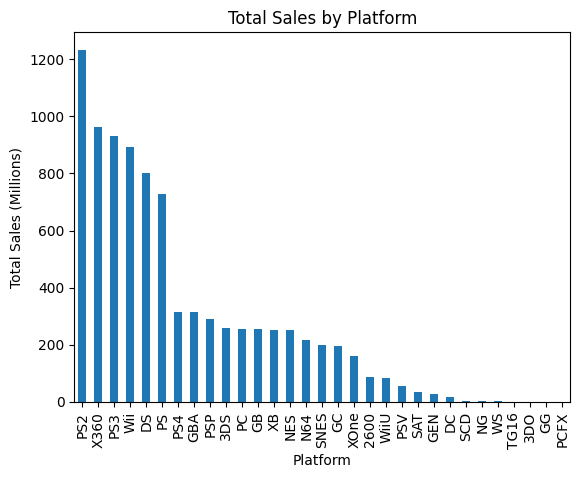

In [12]:
# Plot
platform_sales.plot(
    kind='bar',
    title='Total Sales by Platform',
    xlabel='Platform',
    ylabel='Total Sales (Millions)'
)
plt.show()

### Summary:
The platform sales analysis reveals that the PS2 was the dominant platform, generating over 1.23 billion units in total sales, followed by the Xbox 360 (961.24 million) and PS3 (931.34 million). These platforms contributed significantly to the industry's growth, likely driven by their long lifespans and strong game libraries. Other platforms such as the Wii and DS also performed well, reflecting the diverse market appeal of both home consoles and handheld devices. However, newer platforms like the PS4 and Xbox One have shown relatively lower sales, suggesting that while still successful, they haven't yet reached the sales heights of their predecessors. Additionally, older platforms like the 2600 and WiiU have almost no significant sales in recent years. These insights highlight the importance of considering legacy platforms for retro-focused campaigns, while focusing advertising efforts on current leading platforms to maximize reach and engagement.

In [13]:
# Top platforms
top_platforms = platform_sales.head(5)
top_platforms

Platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: Total_sales, dtype: float64

In [14]:
# Grap data of top platforms
top_platforms_data = data[data['Platform'].isin(top_platforms.index)]

# Group by total sales
platform_year_sales = top_platforms_data.groupby(['Year_of_Release', 'Platform'])['Total_sales'].sum().unstack()
platform_year_sales

Platform,DS,PS2,PS3,Wii,X360
Year_of_Release,,,,,
1985,0.02,NaN,NaN,NaN,NaN
2000,NaN,39.17,NaN,NaN,NaN
2001,NaN,166.43,NaN,NaN,NaN
2002,NaN,205.38,NaN,NaN,NaN
2003,NaN,184.31,NaN,NaN,NaN
2004,17.27,211.81,NaN,NaN,NaN
2005,130.14,160.66,NaN,NaN,8.25
2006,119.81,103.42,20.96,137.15,51.62
2007,146.94,75.99,73.19,152.77,95.41


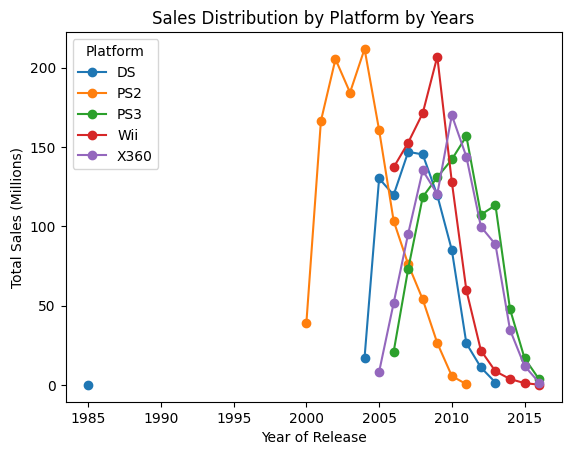

In [15]:
platform_year_sales.plot(
    kind='line',
    marker='o',
    title='Sales Distribution by Platform by Years',
    xlabel='Year of Release',
    ylabel='Total Sales (Millions)'
)
plt.show()

### Summary:
The sales data of the top platforms reveals key trends in platform popularity and longevity. Platforms like PS2 and Wii were dominant in the mid-2000s, with PS2 peaking in 2004 and Wii reaching its highest sales in 2008. Meanwhile, Xbox 360 and PS3 saw consistent sales growth, with notable peaks around 2007 to 2011. By 2013, many older platforms such as the PS2 and Wii had significantly declined, with sales approaching zero. Newer platforms like X360 experienced a slow decline post-2011, while the PS3 saw a steady fall after 2012. These patterns suggest a lifecycle where platforms typically maintain peak sales for about 5 to 6 years before fading, though the transition to new platforms takes several years to fully take hold. For businesses, these insights underscore the importance of targeting platforms in their peak years while preparing for a gradual decline in older platforms. Additionally, investing in emerging platforms could offer substantial returns during their initial growth phase.

Best timeframe for data is 2013-2016. 

### Faded Platforms

In [16]:
# Identify platforms with faded sales in recent years
faded_sales_platforms = platform_year_sales.loc[range(2013,2016)].sum(axis=0)
faded_sales_platforms

Platform
DS        1.54
PS2       0.00
PS3     177.83
Wii      13.48
X360    135.28
dtype: float64

In [17]:
# Faded platforms
faded_platforms = faded_sales_platforms[faded_sales_platforms < 2]
faded_platforms

Platform
DS     1.54
PS2    0.00
dtype: float64

### Platform Lifespan

In [18]:
# Calculate first and last year of sales for each platform
platform_lifespan = top_platforms_data.groupby('Platform')['Year_of_Release'].agg(['min', 'max'])
platform_lifespan['Lifespan'] = platform_lifespan['max'] - platform_lifespan['min']
platform_lifespan

,min,max,Lifespan
Platform,,,
DS,1985,2013,28
PS2,2000,2011,11
PS3,2006,2016,10
Wii,2006,2016,10
X360,2005,2016,11


In [19]:
# Platform lifespan of top 5 platforms
platform_lifespan = platform_lifespan.sort_values('Lifespan', ascending=False)
platform_lifespan

,min,max,Lifespan
Platform,,,
DS,1985,2013,28
PS2,2000,2011,11
X360,2005,2016,11
PS3,2006,2016,10
Wii,2006,2016,10


### Summary:
The platform lifespan analysis highlights the longevity of some key gaming platforms. The DS platform had an impressive lifespan of 28 years, from its first release in 1985 to its last sales recorded in 2013, showing the staying power of handheld consoles. In comparison, platforms like the PS2, X360, PS3, and Wii all had shorter lifespans, ranging from 10 to 11 years. This indicates that, while these platforms had significant success during their peak years, they eventually faded as newer technologies and competitors emerged. The relatively short lifespans of home consoles like PS2 and X360 suggest that businesses must be agile, quickly adapting to new trends and technologies to maintain relevance. These insights emphasize the need for strategic planning around the lifecycle of platforms, ensuring that marketing efforts are concentrated during the prime years of each platform’s existence.

### Total Sales of Games by Platform

In [20]:
# Filter data for time period
data_filtered = data[(data['Year_of_Release'] >= 2013) & (data['Year_of_Release'] <= 2016)]

# Group the data by platform and year
platform_year_sales = data_filtered.groupby(['Platform', 'Year_of_Release'])['Total_sales'].sum().unstack('Year_of_Release')

# Format for box plots
box_data = [platform_year_sales.loc[platform].dropna() for platform in platform_year_sales.index]

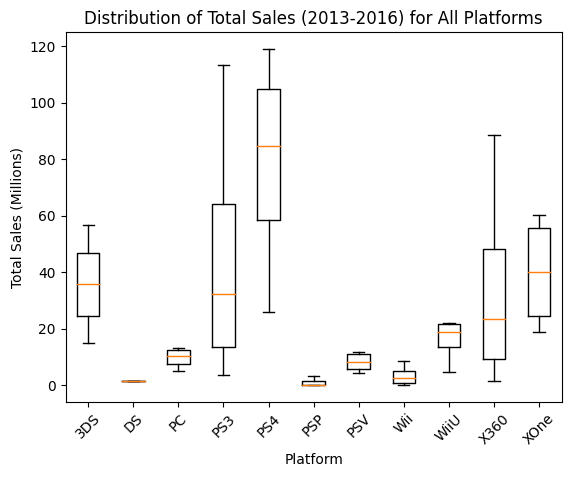

In [21]:
# box plots
plt.boxplot(box_data, labels=platform_year_sales.index)
plt.title('Distribution of Total Sales (2013-2016) for All Platforms')
plt.xlabel('Platform')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45)
plt.show()

### Summary:
The box plots highlight significant variability in annual total sales across platforms. Some platforms show a consistent, narrow range of sales over the years, while others experience dramatic peaks and troughs, indicating volatile performance. These differences provide actionable insights: stable platforms may offer reliable returns, whereas platforms with high variability could benefit from targeted marketing efforts to manage fluctuations and capture peak sales periods.

## Professional Reviews Influence on X360

In [22]:
x360_data = data[data['Platform'] == 'X360']
x360_data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,Total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16613,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01
16622,World Snooker Championship 2007,X360,2007,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Unknown,0.01
16647,Metal Gear Solid HD Edition,X360,2011,Action,0.00,0.00,0.01,0.00,NaN,NaN,M,0.01
16654,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,5.1,E10+,0.01


### Scores vs Total Sales

### Critic Scores vs Total Sales

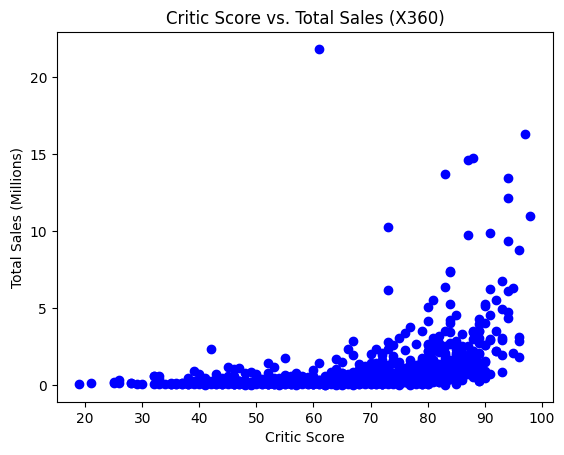

In [23]:
# Scatter plot for Critic_Score vs. Total_sales
plt.scatter(x360_data['Critic_Score'], x360_data['Total_sales'], color='blue')
plt.title('Critic Score vs. Total Sales (X360)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (Millions)')
plt.show()

### User Scores vs Total Sales

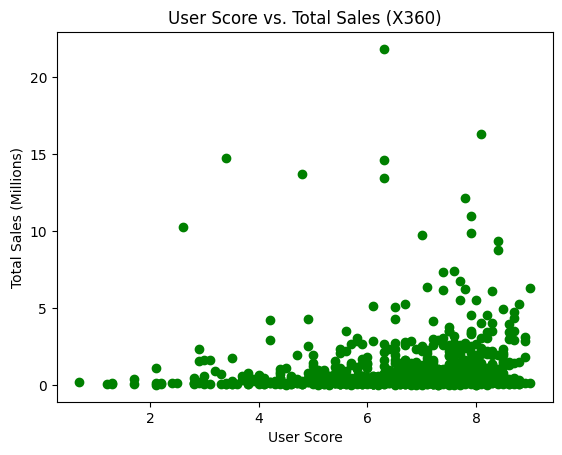

In [24]:
# Scatter plot for User_Score vs. Total_sales
plt.scatter(x360_data['User_Score'], x360_data['Total_sales'], color='green')
plt.title('User Score vs. Total Sales (X360)')
plt.xlabel('User Score')
plt.ylabel('Total Sales (Millions)')
plt.show()

In [25]:
# Correlations
critic_corr = x360_data['Critic_Score'].corr(x360_data['Total_sales']).round(4)
user_corr = x360_data['User_Score'].corr(x360_data['Total_sales']).round(4)

# Display
print("Correlation between Critic Score and Total Sales for X360:", critic_corr)
print("Correlation between User Score and Total Sales for X360:", user_corr)

Correlation between Critic Score and Total Sales for X360: 0.3929
Correlation between User Score and Total Sales for X360: 0.1142


### Summary:
The analysis reveals that for Xbox 360 games, there is a moderate positive correlation (0.3606) between Critic Score and Total Sales, whereas the correlation between User Score and Total Sales is very weak (0.059). This suggests that professional reviews appear to have a more significant influence on sales than user reviews on this platform. From a business perspective, this insight indicates that expert opinions might play a crucial role in shaping consumer perceptions and purchasing decisions for Xbox 360 games. Consequently, emphasizing critic endorsements in marketing and promotional strategies could be more effective in driving sales, while relying solely on user-generated ratings may not yield the same impact.

### Total Sales per Genre

In [26]:
# Filter data for time period
data_filtered = data[(data['Year_of_Release'] >= 2013) & (data['Year_of_Release'] <= 2016)]

# Group by genre and year
genre_year_sales = data_filtered.groupby(['Genre', 'Year_of_Release'])['Total_sales'].sum().unstack('Year_of_Release')

# Format data for box plots
box_data = [genre_year_sales.loc[genre].dropna().values for genre in genre_year_sales.index]

In [27]:
box_data

[array([122.51,  97.23,  72.02,  30.11]),
 array([6.09, 5.57, 8.16, 3.82]),
 array([ 7.09, 15.85,  7.9 ,  4.47]),
 array([25.27, 23.38, 11.57,  2.6 ]),
 array([24.54,  8.81,  6.05,  3.23]),
 array([0.96, 1.49, 0.71, 0.01]),
 array([12.37, 16.66,  8.07,  2.79]),
 array([44.45, 45.62, 37.64, 18.18]),
 array([62.04, 65.21, 67.51, 38.22]),
 array([8.63, 5.58, 5.66, 1.89]),
 array([41.17, 45.15, 40.84, 23.49]),
 array([6.12, 0.98, 1.85, 1.13])]

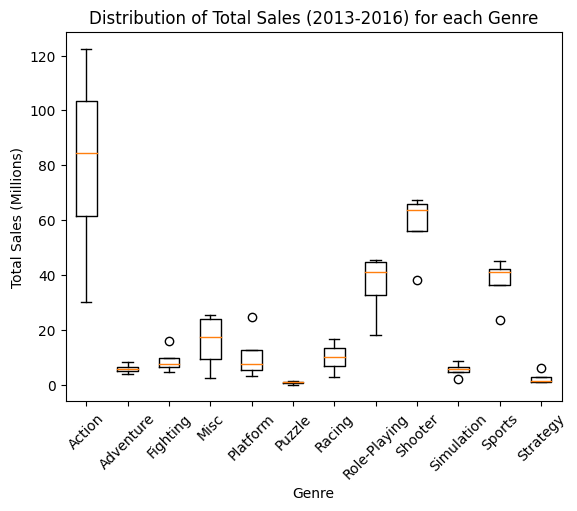

In [28]:
# plot distribution
plt.boxplot(box_data, labels=genre_year_sales.index)
plt.title('Distribution of Total Sales (2013-2016) for each Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45)
plt.show()

### Summary:
The box plots reveal distinct patterns in annual sales performance across platforms from 2013 to 2016. For example, platforms like PS4 and XOne exhibit relatively consistent sales figures over multiple years, suggesting stable performance and a reliable market presence. Conversely, platforms such as PS3 and X360 show a wide range of annual sales, indicating greater volatility. This could reflect fluctuating consumer demand, the impact of blockbuster releases, or transitions between console generations. Some platforms, like DS and PSP, display data for only a single year or very limited activity during this period, which may point to their phasing out or reduced market focus. These insights enable us to tailor marketing strategies and resource allocation by focusing on platforms with stable growth while addressing the variability observed in others, ultimately supporting more informed, data-driven decision-making in our advertising and product planning efforts.

## Create A User Profile for each Region

### Region Platforms

In [29]:
# North America Platforms
na_platforms = data.groupby('Platform')['NA_sales'].sum().sort_values(ascending=False).head(5)
na_platforms

Platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: NA_sales, dtype: float64

In [30]:
# Europe Platforms
eu_platforms = data.groupby('Platform')['EU_sales'].sum().sort_values(ascending=False).head(5)
eu_platforms

Platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: EU_sales, dtype: float64

In [31]:
# Japan Platforms
jp_platforms = data.groupby('Platform')['JP_sales'].sum().sort_values(ascending=False).head(5)
jp_platforms

Platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: JP_sales, dtype: float64

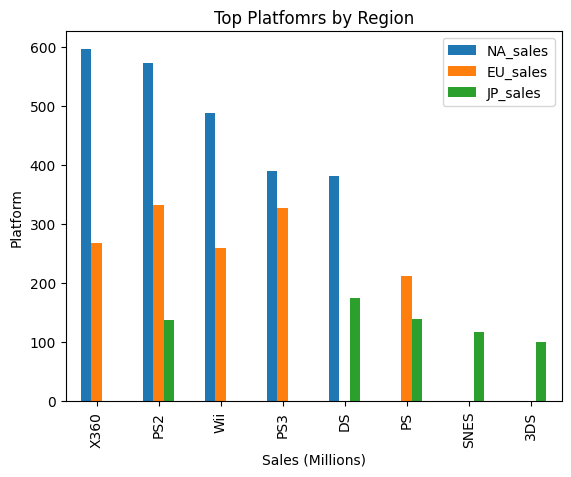

In [32]:
# combine data
combined_df = pd.concat([na_platforms, eu_platforms, jp_platforms], axis=1)
combined_df.columns = ['NA_sales', 'EU_sales', 'JP_sales']

# fill missing values with 0
combined_df = combined_df.fillna(0)

# plot
combined_df.plot(
    kind='bar',
    title='Top Platfomrs by Region',
    xlabel="Sales (Millions)",
    ylabel='Platform'
)
plt.show()

### Summary:
The regional breakdown of platform sales reveals distinct consumer preferences. In North America, the Xbox 360 leads with 595.74 million in sales, followed closely by the PS2, Wii, PS3, and DS—indicating a strong demand for home consoles with robust game libraries and brand loyalty. In Europe, however, Sony's consoles dominate the market, with the PS2 and PS3 accounting for 332.63 and 327.21 million respectively, while the Xbox 360 and Wii trail behind. Meanwhile, Japan's market is notably different, favoring handheld and legacy systems; the DS tops the list with 175.02 million in sales, and older consoles like the SNES and 3DS also make the top five. These variations suggest that marketing strategies should be region-specific—emphasizing Xbox's strengths in North America, capitalizing on Sony's established reputation in Europe, and leveraging handheld, nostalgia-driven titles in Japan.

### Region Genres

In [33]:
# North America Genres
na_genres = data.groupby('Genre')['NA_sales'].sum().sort_values(ascending=False).head(5)
na_genres

Genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: NA_sales, dtype: float64

In [34]:
# Europe Genres
eu_genres = data.groupby('Genre')['EU_sales'].sum().sort_values(ascending=False).head(5)
eu_genres

Genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: EU_sales, dtype: float64

In [35]:
# Japan Genres
jp_genres = data.groupby('Genre')['JP_sales'].sum().sort_values(ascending=False).head(5)
jp_genres

Genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Name: JP_sales, dtype: float64

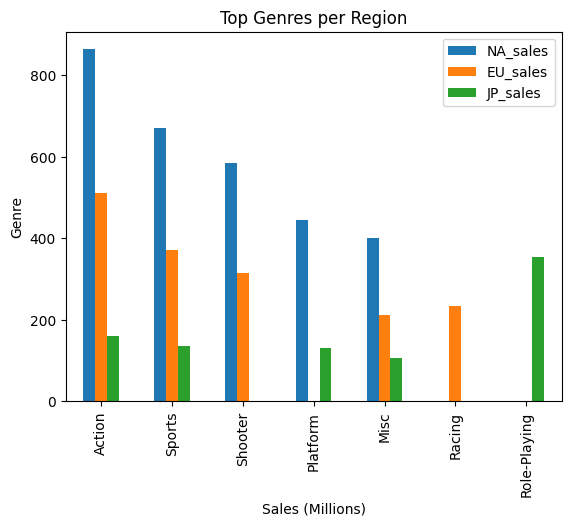

In [36]:
# combine data
combine_df = pd.concat([na_genres, eu_genres, jp_genres], axis=1)
combine_df.columns = ['NA_sales', 'EU_sales', 'JP_sales']

# Fill missing values with 0
combine_df = combine_df.fillna(0)

# plot
combine_df.plot(
    kind='bar',
    title='Top Genres per Region',
    xlabel='Sales (Millions)',
    ylabel='Genre'
)
plt.show()

### Summary:
In North America, the market is heavily dominated by Action games, followed by Sports, Shooter, Role-Playing, and Platform genres, indicating a strong preference for fast-paced and immersive gaming experiences with broad appeal. In Europe, while Action and Sports also lead the sales figures, Shooter titles and Racing games hold significant market share, suggesting that European gamers value both dynamic gameplay and competitive racing experiences. Meanwhile, the Japanese market diverges notably by favoring Role-Playing games as the top genre, with Action and Sports also performing well, followed by Platform and Miscellaneous titles. This regional variation underscores the need for tailored content and marketing strategies: North America’s diverse taste in high-energy genres, Europe’s balanced interest in both action-packed and competitive experiences, and Japan’s distinct inclination towards narrative-rich role-playing games.

### Region Ratings

In [37]:
# Group by rating per region sales
esrb_sales = data.groupby('Rating')[['NA_sales', 'EU_sales', 'JP_sales']].sum()
esrb_sales

,NA_sales,EU_sales,JP_sales
Rating,,,
AO,1.26,0.61,0.00
E,1274.24,703.87,197.96
E10+,345.50,183.35,40.20
EC,1.53,0.11,0.00
K-A,2.56,0.27,1.46
M,742.89,480.00,63.58
RP,0.00,0.03,0.00
T,747.60,421.79,150.70
Unknown,1225.84,609.65,836.74


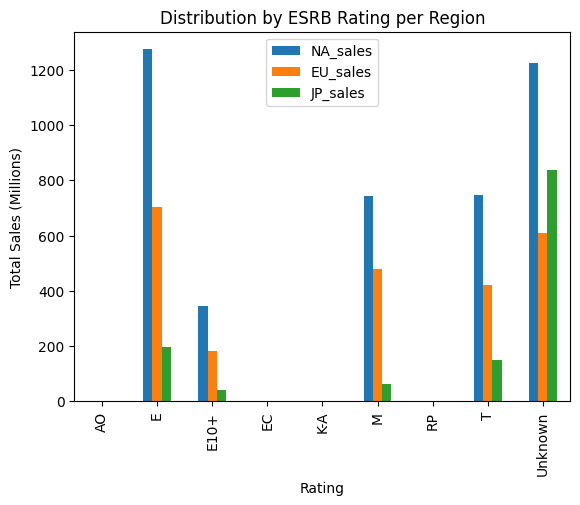

In [38]:
# Plot distribution
esrb_sales.plot(
    kind='bar',
    title='Distribution by ESRB Rating per Region',
    xlabel='Rating',
    ylabel='Total Sales (Millions)'
)
plt.show()

### Summary:
The analysis shows that family-friendly games (rated "E") lead sales in North America and Europe, with 1274.24 million and 703.87 million respectively, while mature ("M") and teen ("T") rated games also perform well in these regions. In Japan, however, sales figures for these ratings are much lower. Notably, the "Unknown" category is significant across all regions, especially in North America and Japan, indicating a large share of games without clear ratings. These insights highlight the need for region-specific strategies that emphasize family-friendly and appropriately rated content in North America and Europe, while addressing the ambiguity in ratings that appears to impact sales in Japan.

## Test Hypotheses

### Hypothesis 1 
H0: Average user ratings of the Xbox One and PC platforms are equal.

H1: Average user ratings of the Xbox One and PC platforms are different. 

In [39]:
# Test hypothesis
# Filter by platform
xbox_one_data = data[(data['Platform'] == 'XOne') & (data['Year_of_Release'] >= 2013) & (data['Year_of_Release'] <= 2016)]
pc_data = data[(data['Platform'] == 'PC') & (data['Year_of_Release'] >= 2013) & (data['Year_of_Release'] <= 2016)]

# Get user score data
xbox_user_scores = xbox_one_data['User_Score'].dropna()
pc_user_scores = pc_data['User_Score'].dropna()

# Variance
xbox_var = xbox_user_scores.var()
pc_var = pc_user_scores.var()

print("Variance in user ratings for Xbox One:", xbox_var)
print("Variance in user ratings for PC:", pc_var)

Variance in user ratings for Xbox One: 1.9069968429360695
Variance in user ratings for PC: 3.035892752408882


In [40]:
# ttest
alpha = 0.05

results = st.ttest_ind(xbox_user_scores, pc_user_scores)
print('pvalue:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis.')
else:
    print("We can't reject the null hypothesis.")

pvalue: 0.14012658403611647
We can't reject the null hypothesis.


### Summary:
The hypothesis test comparing average user ratings for Xbox One and PC games (2013–2016) did not reveal a statistically significant difference, with a p-value of approximately 0.14 well above the 0.05 threshold. This means that, based on user ratings, both platforms perform similarly. Although PC games exhibit slightly higher variability in ratings (variance of 3.04 versus 1.91 for Xbox One), the overall user sentiment remains comparable. For business strategy, this suggests that marketing or product development efforts could be harmonized across these platforms rather than requiring distinctly tailored approaches based solely on user ratings.

### Hypothesis 2
HO: Average user ratings for the Action and Sports genres are different.

H1: Average user ratings for the Action and Sports genres are equal.

In [41]:
# Test Hypothesis
# Filter by genre
action_data = data[(data['Genre'] == 'Action') & (data['Year_of_Release'] >= 2013) & (data['Year_of_Release'] <= 2016)]

# Filter data for Sports genre between 2013 and 2016
sports_data = data[(data['Genre'] == 'Sports') & (data['Year_of_Release'] >= 2013) & (data['Year_of_Release'] <= 2016)]

# Grab user score data
action_user_data = action_data['User_Score'].dropna()
sports_user_data = sports_data['User_Score'].dropna()

# Variance
action_var = action_user_data.var()
sports_var = sports_user_data.var()

print('Variance in user ratings for Action:', action_var)
print('Variance in user ratings for Sports:', sports_var)

Variance in user ratings for Action: 1.7693609042482705
Variance in user ratings for Sports: 3.180612814465409


In [42]:
# ttest
alpha = 0.05

results = st.ttest_ind(action_user_data, sports_user_data)

print('pvalue:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis.')
else:
    print("We can't reject the null hypothesis.")

pvalue: 1.0517832389140023e-27
We reject the null hypothesis.


### Summary:
The hypothesis test comparing average user ratings for Action and Sports games between 2013 and 2016 reveals a highly statistically significant difference, with a p-value of approximately 1.05e-27. This result means that consumers perceive and rate games in these two genres very differently. While Action games have a variance of about 1.77 in their ratings, Sports games show greater variability at around 3.18, suggesting more inconsistent user experiences in that genre. For our business strategy, these findings underscore the importance of tailoring marketing and product development efforts separately for Action and Sports titles. Focusing on the specific strengths and addressing the challenges unique to each genre can help maximize customer satisfaction and improve overall sales performance.

### Formulation of null and alternative hypotheses
These hypotheses were formulated to conduct a two-tailed test, which tests for the possibility of a difference in either direction. This approach is standard in hypothesis testing when there is no prior reason to assume a specific direction for the difference. The use of these comparative statements allows for a straightforward interpretation of the statistical test results and informs decision-making based on whether we can reject the null hypothesis.

### Significance level and why
Alpha = 0.05 is a commonly accepted significance level in hypothesis testing. It means that there is a 5% risk of rejecting the null hypothesis when it is actually true. This threshold strikes a balance between being too strict and too lenient.

## Conclusion:
This comprehensive analysis of the video game market reveals several key insights that can drive strategic decision-making. The data indicates that game releases peaked in the mid-2000s—specifically between 2008 and 2009—driven by the rise of popular gaming platforms and digital distribution, with a subsequent decline in titles in later years. This trend underscores the importance of timing in product launches and marketing efforts.

Platform sales analysis shows that legacy systems like the PS2 and Wii were dominant during their peak years, while home consoles such as the Xbox 360 and PS3 maintained more stable sales over time. In contrast, newer platforms like the PS4 and Xbox One have not yet reached the same sales heights. Suggesting that while current-generation platforms offer growth potential, leveraging the nostalgia and strong game libraries of older systems could be beneficial for retro-focused campaigns.

Regional preferences further distinguish the market. In North America, Xbox 360 leads, reflecting a robust home console culture, whereas European consumers favor Sony platforms, notably the PS2 and PS3. The Japanese market, on the other hand, leans towards handheld and legacy systems, with the DS dominating sales. These variations necessitate tailored regional strategies to effectively engage each market segment.

Genre analysis reveals that high-performing genres such as Action, Sports, and Shooter drive the majority of revenue, largely due to their broad appeal and substantial marketing investments. Meanwhile, niche genres like Puzzle and Strategy offer opportunities for targeted campaigns aimed at specific consumer groups. Additionally, ESRB rating analysis highlights that family-friendly games (rated "E") consistently achieve the highest sales across all regions, while ratings aimed at older audiences perform better in North America and Europe than in Japan.

Our hypothesis tests provide actionable insights for our strategy. The test comparing Xbox One and PC games (2013–2016) showed no significant difference in user ratings (p ≈ 0.14), indicating similar consumer perceptions and allowing for a unified approach. In contrast, the test for Action versus Sports games revealed a highly significant difference (p ≈ 1.05e-27), with Sports games exhibiting greater variability. This indicates that tailored marketing and development strategies are needed to address the distinct consumer experiences in these genres.

Overall, these insights offer a solid foundation for planning targeted advertising campaigns, refining product development, and aligning marketing strategies with regional and platform-specific consumer behaviors. The data-driven conclusions support informed decision-making that can enhance market positioning and drive future growth in the competitive video game industry.